# Improving The Learner Experience

Question:
1. Predict the score quiz if learners has 20 completed lessons
2. Do learners who take lesson A or B perform better on the quiz?

task:
1. Create a model that will help predict the quiz score, using number of lesson as predictor.
2. Create a model that will help predict the quiz score, using number of lesson as predictor.

Details:
- `score:` student score on a quiz
- `completed:` the number of other content items on Codecademy that the learner has completed prior to this quiz
- `lesson:` indicates which lesson the learner took directly before the quiz ('Lesson A' or 'Lesson B')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [14]:
codecademy = pd.read_csv('codecademy.csv')
codecademy.head()

,score,completed,lesson
0,82.7,35.0,Lesson A
1,65.2,31.0,Lesson A
2,55.3,33.0,Lesson A
3,28.8,25.0,Lesson B
4,31.2,18.0,Lesson B


### `Modeling the relationship between quiz score and number of completed content items`

Text(0, 0.5, 'Score')

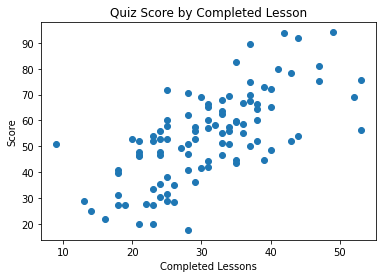

In [21]:
# predicting 'score' by the 'completed' as predictor
plt.scatter(codecademy.completed, codecademy.score)
plt.title('Quiz Score by Completed Lesson')
plt.xlabel('Completed Lessons')
plt.ylabel('Score')

### ` linear regression model that predicts score using completed as the predictor.`

In [44]:
model = sm.OLS.from_formula('score ~ completed', data = codecademy).fit()
model.params

Intercept    13.214113
completed     1.306826
dtype: float64

1. `Given this output we can have a score of 13.21 if we dont complete any lesson.`
2. `There is 1.306 additional score for every lesson we can complete.`

### `Plotting a linear regression`

Text(0, 0.5, 'Score')

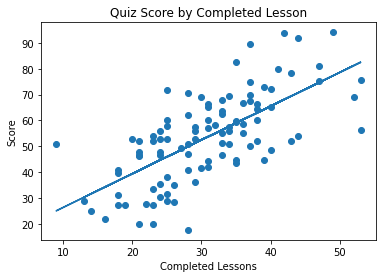

In [46]:
plt.scatter(codecademy.completed, codecademy.score)

# y=mx+b
# predicted_score =  1.306 * codecademy.completed + 13.214
# plt.plot(codecademy.completed, predicted_score)  
# or use this code instead
plt.plot(codecademy.completed, model.params[0] + model.params[1]*codecademy.completed)

plt.title('Quiz Score by Completed Lesson')
plt.xlabel('Completed Lessons')
plt.ylabel('Score')

### Now let's use our model to predict quiz score for learners who has previously completed 20 other content items

In [53]:
score_20lessons =  model.params[0] + model.params[1]*20
score_20lessons

39.35062487732293

###  `Assumption of linear Regression`

In [71]:
# Calculating the fitted values
fitted_values = model.predict(codecademy)
# fitted_values.head()

In [72]:
# calculating residuals
residuals = codecademy.score - fitted_values
# residuals.head()

<function matplotlib.pyplot.clf()>

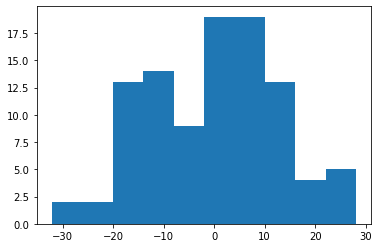

In [69]:
# Checking the normality
plt.hist(residuals)
plt.show
plt.clf
# seems normally distributed

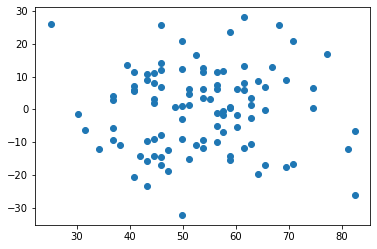

In [70]:
# homoscedasticity assumption
plt.scatter(fitted_values, residuals)

#### There is no pattern in this plot; the homoscedasticity assumption is met.

## `Do learners who take lesson A or B perform better on the quiz?`

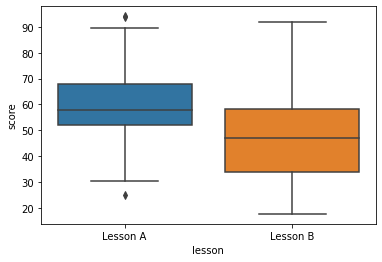

In [77]:
sns.boxplot(x='lesson', y='score', data = codecademy )
plt.show()

### `Creating a linear regression model that predicts score using lesson as the predictor`

In [78]:
model = sm.OLS.from_formula('score ~ lesson', data = codecademy).fit()
model.params

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64

`Lesson A can get you a score of 59.22 while lesson B is  47.578`

In [82]:
# checking the mean on both lessons
codecademy.groupby('lesson').score.mean()

lesson
Lesson A    59.220
Lesson B    47.578
Name: score, dtype: float64

# `Conclusion:`